Business Understanding
- *Tujuan:* Membantu perusahaan pelayanan atau pihak terkait memahami faktor-faktor yang mempengaruhi keselamatan penumpang, serta memprediksi kemungkinan selamatnya penumpang berdasarkan karakteristik tertentu.
- *Manfaat:*
  *   dapat memberika insight untuk perbaikan sistem keselamatan di masa depan
  *   dapat digunakan untuk pelatihan model prediksi pada kasus serupa di industri  transportasi
- *Output Model:* preduksi (0 = Tidak selamat, 1 = selamat) untuk setiap penumpang berdasarkan fitur input.

 selanjutnya kita akan membangun model neural network dengan 2 hidden layer menggunakan data ini.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1IHkIk5uQPTWYjXhVyr3V_hvlYmlM3IpS")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,2
1,893,1,3,1,47.0,1,0,7.0000,0
2,894,0,2,0,62.0,0,0,9.6875,2
3,895,0,3,0,27.0,0,0,8.6625,0
4,896,1,3,1,22.0,1,1,12.2875,0


In [ ]:
# Pemilihan Fitur
X = df.drop('Survived', axis=1)
y = df['Survived']

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
# Layer pertama 16 neuron
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# model.add(Dropout(0.3))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Kompilasi Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Verbose = untuk menampilkan epoch


In [ ]:
# Training Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5649 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6559 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6422 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6901 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6327 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6704 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6580 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6266 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Early Stopping sangat berguna untuk menghentikan proses training secara otomatis jika performa pada data validasi tidak lagi membaik selama 5 epoch berturut-turut. Ini membantu mencegah overfitting.

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(
#     monitor='val_loss',
#     patience=5,
#     restore_best_weights=True
# )

In [ ]:
# Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss pada data uji: {loss:.2f}')
print(f'Accuracy pada data uji: {accuracy:.2f}')

Loss pada data uji: nan
Accuracy pada data uji: 0.60


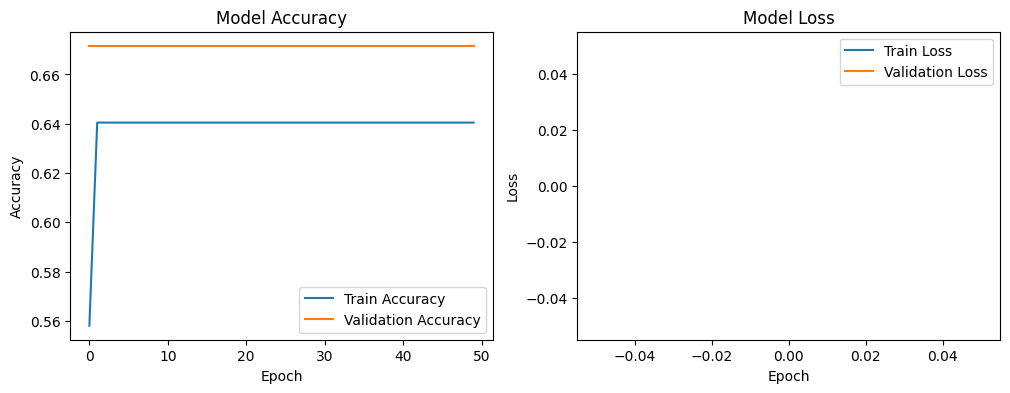

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()